In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [9]:
combined_df = pd.read_csv('../features/combined_happiness_data.csv')
columns_to_use = ['happiness_score', 'family', 'freedom', 'generosity', 'GDP', 'life_expectancy', 'government_corruption']
df_model = combined_df[columns_to_use].dropna()
df_model['government_corruption'] = pd.to_numeric(df_model['government_corruption'], errors='coerce')
df_model = df_model.dropna()
df_model.head()

,happiness_score,family,freedom,generosity,GDP,life_expectancy,government_corruption
0,7.587,1.34951,0.66557,0.29678,1.39651,0.94143,0.41978
1,7.561,1.40223,0.62877,0.43630,1.30232,0.94784,0.14145
2,7.527,1.36058,0.64938,0.34139,1.32548,0.87464,0.48357
3,7.522,1.33095,0.66973,0.34699,1.45900,0.88521,0.36503
4,7.427,1.32261,0.63297,0.45811,1.32629,0.90563,0.32957


Linear Reg

In [10]:
X = df_model.drop('happiness_score', axis=1)
y = df_model['happiness_score']

# Train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.309824650958382
R^2 Score: 0.7518804887905026


Random Forest Regressor have better results

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Try a Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (RF): {mse_rf}")
print(f"R^2 Score (RF): {r2_rf}")


Mean Squared Error (RF): 0.23898547947055335
R^2 Score (RF): 0.8086112251914833


In [12]:
# Save the model
with open('modelo_prediccion_felicidad.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

print("Model saved in 'modelo_prediccion_felicidad.pkl'")

Model saved in 'modelo_prediccion_felicidad.pkl'


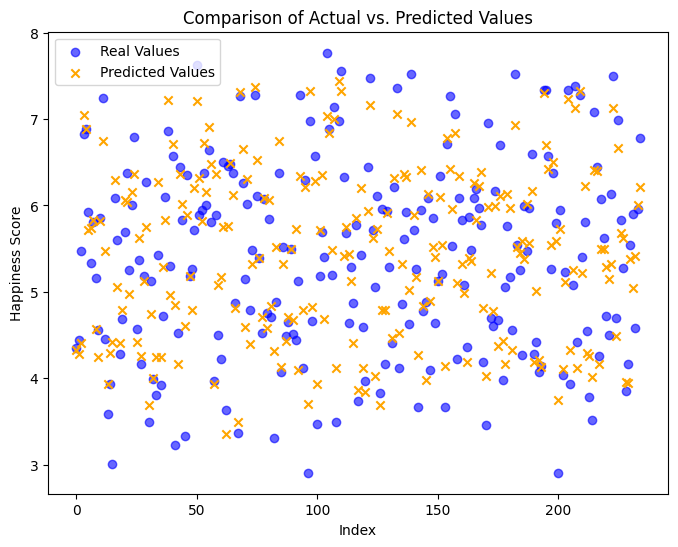

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real Values', alpha=0.6)
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='orange', marker='x', label='Predicted Values')

plt.title('Comparison of Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()


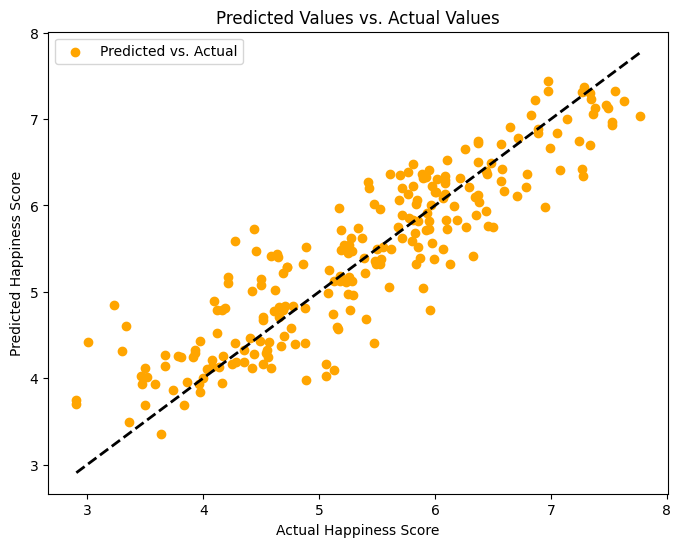

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='orange', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

plt.title('Predicted Values vs. Actual Values')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.legend()
plt.show()


Save the predicted data
